In [2]:
import pydicom
import numpy as np 
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed

output_path = r'C:/Users/USER/Desktop/EXPORT/C03PC915318/CTPR/'

slices = [pydicom.read_file(output_path + '/' + s) for s in (os.listdir(output_path))if s.endswith(".dcm")]#, path에 있는 모든 dicom 파일을 읽었음 
#slices.sort(key = lambda x: int(x00200013.InstanceNumber))#정렬


In [3]:
type(output_path)

str

In [ ]:
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d
type(img3d)

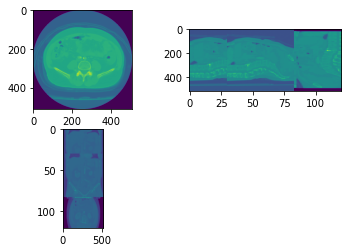

In [15]:
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)
plt.show()

In [27]:
img3d.shape

(512, 512, 121)